# NBA Player Salary Prediction

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [95]:
df = pd.read_csv('nba2k-full.csv')

In [96]:
df.head()

,full_name,rating,jersey,team,position,b_day,height,weight,salary,country,draft_year,draft_round,draft_peak,college,version
0,LeBron James,97,#23,Los Angeles Lakers,F,12/30/84,6-9 / 2.06,250 lbs. / 113.4 kg.,$37436858,USA,2003,1,1,NaN,NBA2k20
1,Kawhi Leonard,97,#2,Los Angeles Clippers,F,06/29/91,6-7 / 2.01,225 lbs. / 102.1 kg.,$32742000,USA,2011,1,15,San Diego State,NBA2k20
2,Giannis Antetokounmpo,96,#34,Milwaukee Bucks,F-G,12/06/94,6-11 / 2.11,242 lbs. / 109.8 kg.,$25842697,Greece,2013,1,15,NaN,NBA2k20
3,Kevin Durant,96,#7,Brooklyn Nets,F,09/29/88,6-10 / 2.08,230 lbs. / 104.3 kg.,$37199000,USA,2007,1,2,Texas,NBA2k20
4,James Harden,96,#13,Houston Rockets,G,08/26/89,6-5 / 1.96,220 lbs. / 99.8 kg.,$38199000,USA,2009,1,3,Arizona State,NBA2k20


In [97]:
df.shape

(464, 15)

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 464 entries, 0 to 463
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   full_name    464 non-null    object
 1   rating       464 non-null    int64 
 2   jersey       464 non-null    object
 3   team         441 non-null    object
 4   position     464 non-null    object
 5   b_day        464 non-null    object
 6   height       464 non-null    object
 7   weight       464 non-null    object
 8   salary       464 non-null    object
 9   country      464 non-null    object
 10  draft_year   464 non-null    int64 
 11  draft_round  464 non-null    object
 12  draft_peak   464 non-null    object
 13  college      388 non-null    object
 14  version      464 non-null    object
dtypes: int64(2), object(13)
memory usage: 54.5+ KB


In [99]:
df = df.dropna()

In [100]:
# No NA values
df.isnull().sum().sum()

0

In [101]:
# Removing non-informative attributes
df = df.drop(['full_name', 'b_day', 'height', 'weight', 'college', 'version'], axis = 1)
df.head()

,rating,jersey,team,position,salary,country,draft_year,draft_round,draft_peak
1,97,#2,Los Angeles Clippers,F,$32742000,USA,2011,1,15
3,96,#7,Brooklyn Nets,F,$37199000,USA,2007,1,2
4,96,#13,Houston Rockets,G,$38199000,USA,2009,1,3
5,95,#30,Golden State Warriors,G,$40231758,USA,2009,1,7
6,94,#3,Los Angeles Lakers,F-C,$27093019,USA,2012,1,1


In [102]:
def remove_hash(value):
    value = value[1:]
    return int(value)

df['jersey'] = df['jersey'].apply(remove_hash)
df['salary'] = df['salary'].apply(remove_hash)

In [103]:
df.head()

,rating,jersey,team,position,salary,country,draft_year,draft_round,draft_peak
1,97,2,Los Angeles Clippers,F,32742000,USA,2011,1,15
3,96,7,Brooklyn Nets,F,37199000,USA,2007,1,2
4,96,13,Houston Rockets,G,38199000,USA,2009,1,3
5,95,30,Golden State Warriors,G,40231758,USA,2009,1,7
6,94,3,Los Angeles Lakers,F-C,27093019,USA,2012,1,1


In [104]:
df['team'].value_counts()

team
Brooklyn Nets             17
Los Angeles Clippers      15
Los Angeles Lakers        15
Indiana Pacers            14
Milwaukee Bucks           14
Philadelphia 76ers        14
Orlando Magic             14
New Orleans Pelicans      14
New York Knicks           13
Chicago Bulls             13
Toronto Raptors           13
Minnesota Timberwolves    13
Houston Rockets           13
Memphis Grizzlies         12
Detroit Pistons           12
Sacramento Kings          12
Phoenix Suns              12
Miami Heat                12
San Antonio Spurs         12
Atlanta Hawks             12
Denver Nuggets            12
Golden State Warriors     11
Dallas Mavericks          11
Boston Celtics            11
Portland Trail Blazers    11
Washington Wizards        11
Oklahoma City Thunder     10
Cleveland Cavaliers       10
Utah Jazz                  9
Charlotte Hornets          7
Name: count, dtype: int64

In [105]:
df['country'].value_counts()

country
USA                   315
Canada                 15
Australia               8
Cameroon                5
Nigeria                 3
The Bahamas             2
Ukraine                 2
Mali                    1
Egypt                   1
Haiti                   1
Angola                  1
Germany                 1
Italy                   1
United Kingdom          1
Japan                   1
Israel                  1
Austria                 1
Senegal                 1
Puerto Rico             1
Philippines             1
Lithuania               1
New Zealand             1
Finland                 1
Dominican Republic      1
Montenegro              1
Greece                  1
Name: count, dtype: int64

In [106]:
def removecountryoutlier(value):
    if value not in ['USA', 'Canada', 'Australia']:
        return 'Others'
    else:
        return value

df['country'] = df['country'].apply(removecountryoutlier)

In [107]:
df['country'].value_counts()

country
USA          315
Others        31
Canada        15
Australia      8
Name: count, dtype: int64

In [108]:
df['position'].value_counts()

position
G      166
F      123
C       31
F-C     26
G-F     11
F-G      7
C-F      5
Name: count, dtype: int64

In [109]:
df['draft_round'].unique()

array(['1', '2', 'Undrafted'], dtype=object)

In [110]:
def removeundrafted(value):
    if value == "Undrafted":
        return None
    else:
        return value

df['draft_round'] = df['draft_round'].apply(removeundrafted)
df['draft_peak'] = df['draft_peak'].apply(removeundrafted)

df = df.dropna()

In [111]:
from sklearn.preprocessing import LabelEncoder

# String labels are integer labels:
le = LabelEncoder()
df['position'] = le.fit_transform(df['position'])
df['country'] = le.fit_transform(df['country'])
df['team'] = le.fit_transform(df['team'])

In [112]:
df.head()

,rating,jersey,team,position,salary,country,draft_year,draft_round,draft_peak
1,97,2,12,2,32742000,3,2011,1,15
3,96,7,2,2,37199000,3,2007,1,2
4,96,13,10,5,38199000,3,2009,1,3
5,95,30,9,5,40231758,3,2009,1,7
6,94,3,13,3,27093019,3,2012,1,1


In [113]:
# Creating training/test split:
x = df.drop(['salary'], axis = 1)
y = df['salary']   # trying to predict salary

In [114]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [115]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)
predictions = lr.predict(x_test)     # predicted salary for each training observation

In [117]:
diff = y_test - predictions

/var/folders/wp/b15fgf414nn0z0y1npgy6lfm0000gq/T/ipykernel_42082/1670086357.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(diff)
/Users/danielliu/anaconda3/envs/tunebuild/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/danielliu/anaconda3/envs/tunebuild/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

<Axes: xlabel='salary', ylabel='Density'>

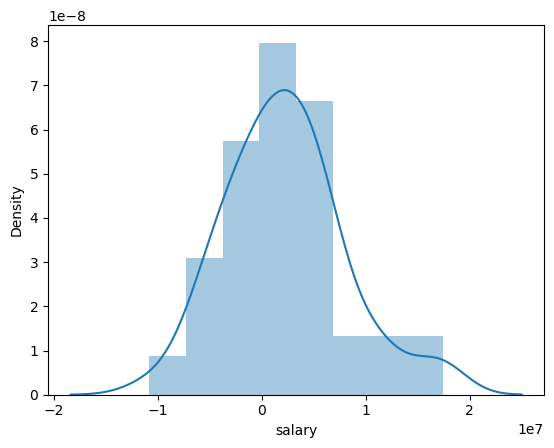

In [120]:
# Plot of residuals
import seaborn as sns
sns.distplot(diff)

In [121]:
import pickle
pickle.dump(lr,     # fitted linear regression
            open('./model.sav', 'wb')      # saving model
            )